# Problem 7.6 

Initialisation

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig
import scipy.linalg as la

### State Space model

Parameters for the problem

set1 = {a=1, b=1, c=1}
set2 = {a=2, b=0, c=2}
set3 = {a=$\frac{1}{4}$, b=1, c=$\frac{1}{3}$}
set4 = {a=1, b=$\sqrt{5}$, c=-1}

In [3]:
a = 1
b = np.sqrt(5) 
c = -1

The matrisces are given by:
$$
\mathbb{A} = \left(
\begin{matrix}
-a & -b \\
-b & -c
\end{matrix}
\right),
\;
\mathbb{B} = \left(
\begin{matrix}
1 & 0 \\ 
0 & 1
\end{matrix}
\right),
\;
\mathbb{C} = \left(
\begin{matrix}
1 & 1 \\
1 & -1 
\end{matrix}
\right),
\;
\mathbb{D} = \left(
\begin{matrix}
0 & 0 \\
0 & 0 
\end{matrix}
\right).
$$

In [4]:
aa = np.array([[-1, b],[-b, -c]])
bb = np.array([[1,0],[0, 1]])
cc = np.array([[1, 1],[1,-1]])
dd = np.array([[0,0],[0,0]])
sys6 = sig.StateSpace(aa, bb, cc, dd)
print("System 6 in State-Space is: ",sys6)

System 6 in State-Space is:  StateSpaceContinuous(
array([[-1.        ,  2.23606798],
       [-2.23606798,  1.        ]]),
array([[1, 0],
       [0, 1]]),
array([[ 1,  1],
       [ 1, -1]]),
array([[0, 0],
       [0, 0]]),
dt: None
)


Calculate the eigenvalues of matrix A:

In [5]:
eig6 = la.eigvals(aa)
print('The eigenvalues of the A-matrix are: ',eig6)

The eigenvalues of the A-matrix are:  [5.55111512e-17+2.j 5.55111512e-17-2.j]


Calculate the Transfer functons

In [6]:
tf61 = sys6.to_tf(input=0)
print('The transfer functions of input 1 are: ',tf61)
#
tf6a=sig.TransferFunction(tf61.num[0],tf61.den)
print('The first transferfunction is: ',tf6a)
zpk6a = tf6a.to_zpk()
print('The ZerosPolesGain model of the first input is: ', zpk6a)
#
tf6b=sig.TransferFunction(tf61.num[1],tf61.den)
print('The second transferfunction is: ',tf6b)
zpk6b = tf6b.to_zpk()
print('The ZerosPolesGain model is: ', zpk6b)
#
tf62 = sys6.to_tf(input=1)
print('The transfer functions of input 2 are: ',tf62)
tf6c=sig.TransferFunction(tf62.num[0],tf62.den)
print('The third transferfunction is: ',tf6c)
zpk6c = tf6c.to_zpk()
print('The ZerosPolesGain model is: ', zpk6c)
#
tf6d=sig.TransferFunction(tf62.num[1],tf62.den)
print('The fourth transferfunction is: ',tf6d)
zpk6d = tf6d.to_zpk()
print('The ZerosPolesGain model is: ', zpk6d)

The transfer functions of input 1 are:  TransferFunctionContinuous(
array([[ 1.        , -3.23606798],
       [ 1.        ,  1.23606798]]),
array([ 1.00000000e+00, -1.11022302e-16,  4.00000000e+00]),
dt: None
)
The first transferfunction is:  TransferFunctionContinuous(
array([ 1.        , -3.23606798]),
array([ 1.00000000e+00, -1.11022302e-16,  4.00000000e+00]),
dt: None
)
The ZerosPolesGain model of the first input is:  ZerosPolesGainContinuous(
array([3.23606798]),
array([0.+2.j, 0.-2.j]),
1.0,
dt: None
)
The second transferfunction is:  TransferFunctionContinuous(
array([1.        , 1.23606798]),
array([ 1.00000000e+00, -1.11022302e-16,  4.00000000e+00]),
dt: None
)
The ZerosPolesGain model is:  ZerosPolesGainContinuous(
array([-1.23606798]),
array([0.+2.j, 0.-2.j]),
1.0000000000000004,
dt: None
)
The transfer functions of input 2 are:  TransferFunctionContinuous(
array([[ 1.        ,  3.23606798],
       [-1.        ,  1.23606798]]),
array([ 1.00000000e+00, -1.11022302e-16,  4.000

C:\ProgramData\Anaconda3\lib\site-packages\scipy\signal\filter_design.py:1622: BadCoefficients: Badly conditioned filter coefficients (numerator): the results may be meaningless
  "results may be meaningless", BadCoefficients)


In [7]:
zeros6 = tf6a.zeros
print('The zeros of the sytem are: ',zeros6)
poles6 = tf6a.poles
print('The poles of the sytem are: ',poles6)
zeros6 = tf6b.zeros
print('The zeros of the sytem are: ',zeros6)
poles6 = tf6b.poles
print('The poles of the sytem are: ',poles6)
zeros6 = tf6c.zeros
print('The zeros of the sytem are: ',zeros6)
poles6 = tf6c.poles
print('The poles of the sytem are: ',poles6)
zeros6 = tf6c.zeros
print('The zeros of the sytem are: ',zeros6)
poles6 = tf6c.poles
print('The poles of the sytem are: ',poles6)

The zeros of the sytem are:  [3.23606798]
The poles of the sytem are:  [0.+2.j 0.-2.j]
The zeros of the sytem are:  [-1.23606798]
The poles of the sytem are:  [0.+2.j 0.-2.j]
The zeros of the sytem are:  [-3.23606798]
The poles of the sytem are:  [0.+2.j 0.-2.j]
The zeros of the sytem are:  [-3.23606798]
The poles of the sytem are:  [0.+2.j 0.-2.j]


### Bode plots

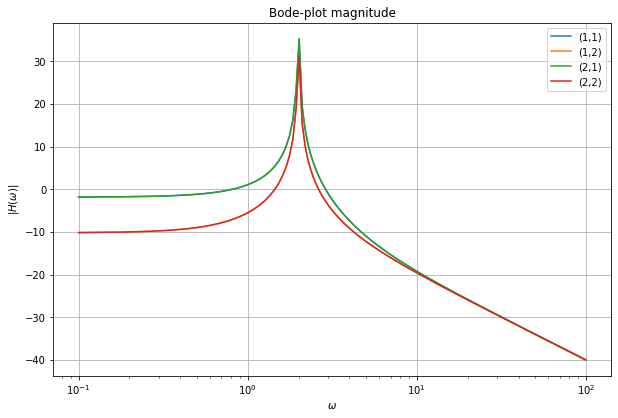

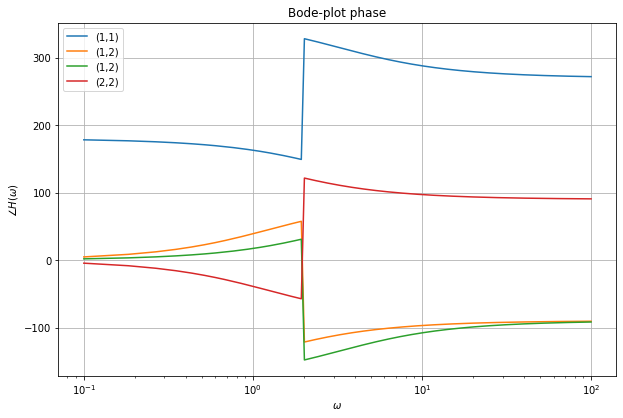

In [8]:
ws = np.linspace(10**-1, 10**2, 1200)
wa, maga, phasea = tf6a.bode(ws)
wb, magb, phaseb = tf6b.bode(ws)
wc, magc, phasec = tf6c.bode(ws)
wd, magd, phased = tf6d.bode(ws)
plt.figure(figsize=(10,6.5))
plt.semilogx(wa, maga, label = '(1,1)')    # Bode magnitude plot system 1
plt.semilogx(wb, magb, label = '(1,2)')    # Bode magnitude plot system 3
plt.semilogx(wc, magc, label = '(2,1)')    # Bode magnitude plot system 1
plt.semilogx(wd, magd, label = '(2,2)')    # Bode magnitude plot system 1
plt.xlabel (r'$\omega$')
plt.ylabel (r'$|H(\omega)|$')
plt.title('Bode-plot magnitude')
plt.grid(True)
plt.legend()
plt.figure(figsize=(10,6.5))
plt.semilogx(wa, phasea, label = '(1,1)')  # Bode phase plot system 1
plt.semilogx(wb, phaseb, label = '(1,2)')  # Bode phase plot system 3
plt.semilogx(wc, phasec, label = '(1,2)')  # Bode phase plot system 3
plt.semilogx(wd, phased, label = '(2,2)')  # Bode phase plot system 3
plt.xlabel (r'$\omega$')
plt.ylabel (r'$\angle H(\omega)$')
plt.legend()
plt.title('Bode-plot phase')
plt.grid(True)
plt.show()

Caculate and show the step-response

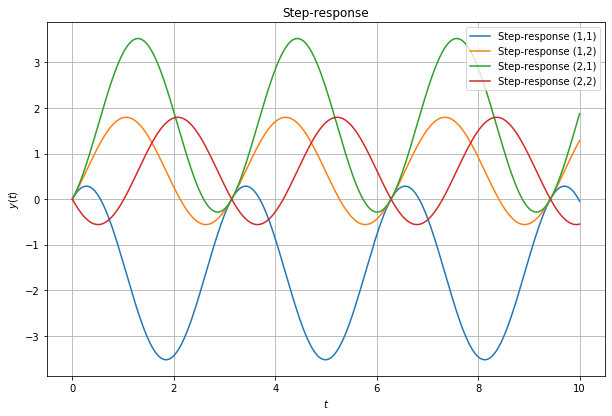

In [9]:
t6 = np.linspace(0, 1*10**(1), num=400)
u6a = 2*np.ones_like(t6)
u6b = 2*np.zeros_like(t6)
init = np.array([0.,0.])
tout6a, y6a, x6a = sig.lsim(tf6a, u6a, t6, X0 = init)
tout6b, y6b, x6b = sig.lsim(tf6b, u6a, t6, X0 = init)
tout6c, y6c, x6c = sig.lsim(tf6c, u6a, t6, X0 = init)
tout6d, y6d, x6d = sig.lsim(tf6d, u6a, t6, X0 = init)
plt.figure(figsize=(10,6.5))
plt.plot(t6, y6a, label='Step-response (1,1)')
plt.plot(t6, y6b, label='Step-response (1,2)')
plt.plot(t6, y6c, label='Step-response (2,1)')
plt.plot(t6, y6d, label='Step-response (2,2)')
plt.xlabel (r'$t$')
plt.ylabel (r'$y(t)$')
plt.title('Step-response')
plt.legend()
plt.grid(True)
plt.show()